In [2]:
from minorminer.minorminer import find_embedding
from dwave.system import DWaveSampler, EmbeddingComposite
from dwave.embedding import embed_bqm, EmbeddedStructure
import networkx as nx
import dwave_networkx as dnx
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
# import statsmodels.api as sm
import pandas as pd
from minorminer.busclique import busgraph_cache, find_clique_embedding
from scipy.optimize import curve_fit
from scipy.stats import t, ttest_rel
import time

densities = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
sizes = np.array([10+ 5*i for i in range(59)])

In [6]:
with open("pickles/RQ2.pkl", 'rb') as f:
    percentages, times, acl, num_qubits = pickle.load(f)
    # embedding_container_large = pickle.load(f)

A = mean_acl = np.nanmean(acl, axis = -1)
mean_nq = np.nanmean(num_qubits, axis = -1)

min_acl = np.nanmin(acl, axis = -1)
min_nq = np.nanmin(num_qubits, axis = -1)

std_acl = np.std(acl, axis=-1)
std_nq = np.std(num_qubits, axis=-1)

with open("pickles/RQ2_clique_embedder.pkl", 'rb') as f:
    clique_acl, clique_num_qubits = pickle.load(f)
    # embedding_container_large = pickle.load(f)

C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\4073363181.py:5: RuntimeWarning: Mean of empty slice
  A = mean_acl = np.nanmean(acl, axis = -1)
C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\4073363181.py:6: RuntimeWarning: Mean of empty slice
  mean_nq = np.nanmean(num_qubits, axis = -1)
C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\4073363181.py:8: RuntimeWarning: All-NaN slice encountered
  min_acl = np.nanmin(acl, axis = -1)
C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\4073363181.py:9: RuntimeWarning: All-NaN slice encountered
  min_nq = np.nanmin(num_qubits, axis = -1)


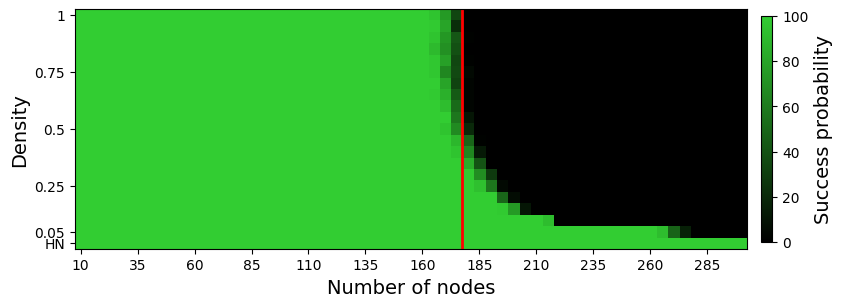

In [20]:
PER = np.zeros((21,59))
PER[1:] = percentages
PER[0] = 100

colors = ['black', 'limegreen']  # RGB tuples: green to black
from matplotlib.colors import LinearSegmentedColormap
# Create the colormap
green_to_black = LinearSegmentedColormap.from_list("green_to_black", colors)

fig, ax = plt.subplots(figsize = (9,4))
im = plt.imshow(PER, cmap=green_to_black)
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
# ax.set_xticks(range(0,len(sizes)-13,5),labels = list(sizes[range(18,len(sizes),5)])+[300])
ax.set_xticks(range(0,59,5),labels = range(10,59*5+10,25))
ax.set_yticks([0,1,5,10,15,20], labels=["HN", 0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.0162, pad=0.02)
cbar.set_label('Success probability', fontsize=14)

ax.axvline(x=33.5, color='red', linewidth=2)
# plt.savefig("frontier.pdf", bbox_inches = 'tight')
plt.show()

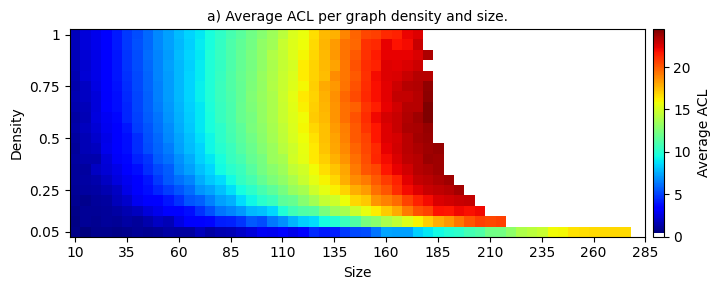

In [5]:
fig, ax = plt.subplots(figsize=(100, 3))
im = plt.imshow(A[:,:55], cmap="jet")
ax.invert_yaxis()
ax.set_title('a) Average ACL per graph density and size.', fontsize=10)
ax.set_xlabel('Size', fontsize=10)
ax.set_ylabel('Density', fontsize=10)
ax.set_xticks(range(0,len(sizes),5),labels = sizes[range(0,len(sizes),5)])

ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])
# ax.set_yticks([1, 5, 10, 15, 20], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.015, pad=0.0008)
cbar.set_label('Average ACL', fontsize=10)
cbar.set_ticks(range(0,25,5))
cbar.set_ticklabels(range(0,25,5))

plt.tight_layout()
# plt.savefig('performance.svg')
plt.show()

C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_12920\2732918821.py:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=2000)


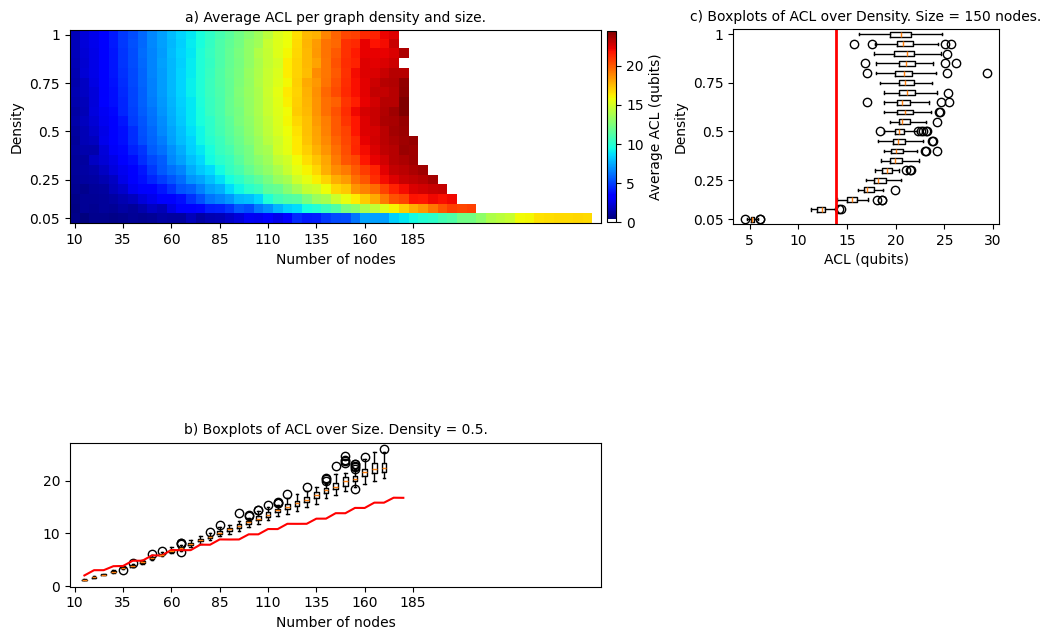

In [8]:
# # Create a 2x2 grid (first figure spans top row)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True, width_ratios=[3, 1.5], height_ratios=[4, 1])
plt.subplots_adjust(hspace=2000)


# First subplot (0,0) spanning both columns
im = axs[0, 0].imshow(A[:, :55], cmap="jet")
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('a) Average ACL per graph density and size.', fontsize=10)
axs[0, 0].set_xlabel('Number of nodes', fontsize=10)
axs[0, 0].set_ylabel('Density', fontsize=10)
axs[0, 0].set_xticks(range(0, len(sizes), 5), labels=sizes[range(0, len(sizes), 5)])
axs[0, 0].set_yticks([0, 4, 9, 14, 19], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = fig.colorbar(im, ax=axs[0, 0], fraction=0.018, pad=0.01)
cbar.set_label('Average ACL (qubits)', fontsize=10)
cbar.set_ticks(range(0, 25, 5))
cbar.set_ticklabels(range(0, 25, 5))

# Second subplot (1,0) - Boxplot over Size
den = 9
axs[1, 0].boxplot(acl[den, :36].T)
# axs[1, 0].set_ylabel('ACL', fontsize=10)
axs[1, 0].set_xlabel('Number of nodes', fontsize=10)
axs[1, 0].set_title(f'b) Boxplots of ACL over Size. Density = {densities[den]}.', fontsize=10)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_xticks(range(0, 36, 5), labels=range(10, 210, 25))

axs[1, 0].plot(range(1, 35), clique_acl[:34], 'red')

# Third subplot (1,1) - Boxplot over Density
size = 28
axs[0, 1].boxplot(acl[:,size,:].T, vert=False, positions = range(20))
axs[0, 1].set_xlabel('ACL (qubits)', fontsize=10)
axs[0, 1].set_ylabel('Density', fontsize=10)
axs[0, 1].set_title(f'c) Boxplots of ACL over Density. Size = {sizes[size]} nodes.', fontsize=10)
axs[0, 1].sharey(axs[0, 0])
# axs[0, 1].set_ylim(axs[0, 0].get_ylim())
# axs[0, 0].set_aspect(1)
# axs[0, 1].set_aspect(1)
# axs[0, 1].set_yticks(axs[0, 0].get_yticks())
# axs[0, 1].set_yticks([0, 4, 9, 14, 19], labels=[0.05, 0.25, 0.5, 0.75, 1])
axs[0, 1].axvline(x=2074 / 150, color='red', linewidth=2)

# rectangular_aspect = axs[0, 0].get_box_aspect()  # Get the natural aspect ratio of [0,0]
# axs[0, 1].set_aspect(rectangular_aspect)  # Apply it to [0,1]


# axs[0, 0].set_ylim(0, 20)
# axs[1, 0].set_xlim(0, 34)

axs[0, 1].set_aspect(axs[0, 0].get_aspect())

# Hide empty top-right subplot (0,1)
fig.delaxes(axs[1, 1])



# Show the combined figure
# plt.tight_layout

# plt.savefig("trifigure.svg")
plt.show()

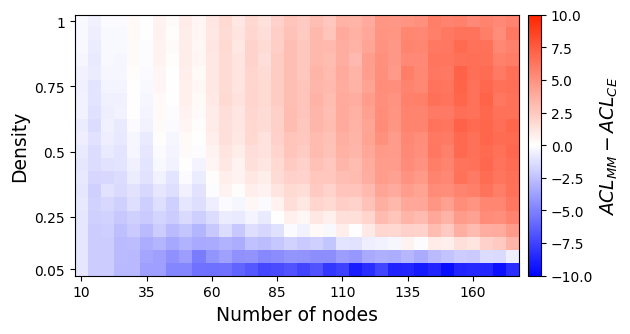

In [14]:

# Get the 'jet' colormap
jet = plt.get_cmap('jet')

# Extract the red and blue ends from jet
blue_jet = jet(0.13)   # RGBA at the blue end
red_jet = jet(0.87)    # RGBA at the red end

# Create a new diverging colormap: red (from jet) -> white -> blue (from jet)
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_bwr_like',
    [blue_jet, (1, 1, 1, 1), red_jet],  # RGBA values: red -> white -> blue
    N=256
)


B = np.maximum(A,np.ones(np.shape(A)))[:,:34] - [clique_acl[:34] for i in range(20)]

fig, ax = plt.subplots()
im = plt.imshow(B, cmap = custom_cmap, vmin = -10, vmax = 10)
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=13.5)
ax.set_ylabel('Density', fontsize=13.5)
ax.set_xticks(range(0,35,5),labels = range(10,185,25))
ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])

# Add color bar
cbar = plt.colorbar(im, fraction=0.028, pad=0.02)
cbar.set_label(label=fr'$ACL_{{MM}} - ACL_{{CE}}$', fontsize=13.5)

plt.tight_layout()
# plt.savefig('mm_vs_ce.pdf', bbox_inches='tight')

plt.show()

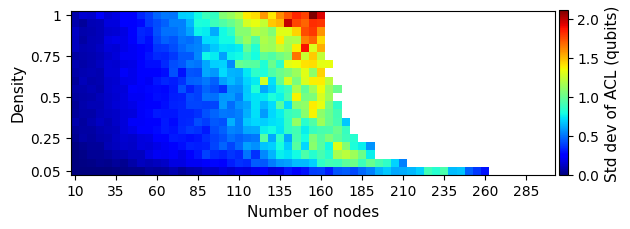

In [16]:
fig, ax = plt.subplots()
im = plt.imshow(std_acl, cmap="jet")
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=11)
ax.set_ylabel('Density', fontsize=11)
ax.set_xticks(range(0,len(sizes),5),labels = sizes[range(0,len(sizes),5)])

ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.0166, pad=0.01)
cbar.set_label('Std dev of ACL (qubits)', fontsize=11)

plt.tight_layout()

# plt.savefig('std.pdf', bbox_inches='tight')
plt.show()



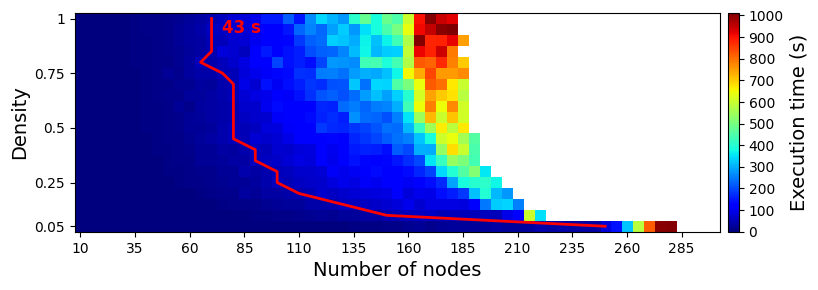

In [9]:
T = times.copy()
T[T == 0] = np.nan

fig, ax = plt.subplots(figsize=(100, 3))
im = plt.imshow(T, cmap="jet")

# --- Compute the clean boundary line ---
boundary_x = []
boundary_y = []

for y in range(T.shape[0]):
    row = T[y]
    x_indices = np.where(row >= 43)[0]
    if len(x_indices) > 0:
        boundary_x.append(x_indices[0])
        boundary_y.append(y)

# Plot clean red line
ax.plot(boundary_x, boundary_y, color='red', linewidth=2)

# Add '18 s' label at the end of the line
label_x = boundary_x[-1]
label_y = boundary_y[-1]
ax.text(label_x + 1, label_y, "43 s", color='red', fontsize=12, weight='bold', va='top')

ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_xticks(range(0, len(sizes), 5), labels=sizes[range(0, len(sizes), 5)])
ax.set_yticks([0, 4, 9, 14, 19], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction=0.015, pad=0.0008)
cbar.set_label('Execution time (s)', fontsize=14)
cbar.set_ticks(range(0, 1001, 100))
cbar.set_ticklabels(range(0, 1001, 100))

plt.tight_layout()
plt.show()


# Layout Embedder

In [10]:
with open("pickles/RQ2.pkl", 'rb') as f:
    percentages, times, acl, num_qubits = pickle.load(f)
    # embedding_container_large = pickle.load(f)

densities = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
sizes = np.array([10+ 5*i for i in range(59)])

A = mean_acl = np.nanmean(acl, axis = -1)
mean_nq = np.nanmean(num_qubits, axis = -1)

min_acl = np.nanmin(acl, axis = -1)
min_nq = np.nanmin(num_qubits, axis = -1)

std_acl = np.std(acl, axis=-1)
std_nq = np.std(num_qubits, axis=-1)

with open("pickles/RQ2_layout_embedder.pkl", 'rb') as f:
    layout_percentages, layout_times, layout_acl, layout_num_qubits = pickle.load(f)
    # embedding_container_large = pickle.load(f)

layout_A = layout_mean_acl = np.nanmean(layout_acl, axis = -1)
layout_mean_nq = np.nanmean(layout_num_qubits, axis = -1)

layout_min_acl = np.nanmin(layout_acl, axis = -1)
layout_min_nq = np.nanmin(layout_num_qubits, axis = -1)

layout_std_acl = np.nanstd(layout_acl, axis=-1)
layout_std_nq = np.nanstd(layout_num_qubits, axis=-1)

with open("pickles/RQ2_clique_embedder.pkl", 'rb') as f:
    clique_acl, clique_num_qubits = pickle.load(f)
    # embedding_container_large = pickle.load(f)

C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\3775394674.py:8: RuntimeWarning: Mean of empty slice
  A = mean_acl = np.nanmean(acl, axis = -1)
C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\3775394674.py:9: RuntimeWarning: Mean of empty slice
  mean_nq = np.nanmean(num_qubits, axis = -1)
C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\3775394674.py:11: RuntimeWarning: All-NaN slice encountered
  min_acl = np.nanmin(acl, axis = -1)
C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\3775394674.py:12: RuntimeWarning: All-NaN slice encountered
  min_nq = np.nanmin(num_qubits, axis = -1)
C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\3775394674.py:21: RuntimeWarning: Mean of empty slice
  layout_A = layout_mean_acl = np.nanmean(layout_acl, axis = -1)
C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\3775394674.py:22: RuntimeWarning: Mean of empty slice
  layout_mean_nq = np.nanmean(layout_num_qubi

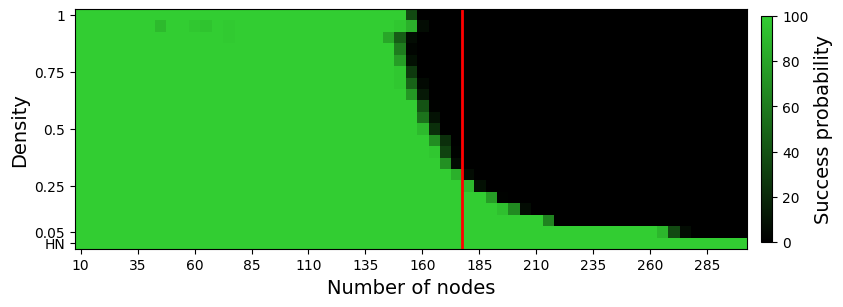

In [33]:
layout_PER = np.zeros((21,59))
layout_PER[1:] = layout_percentages
layout_PER[0] = 100

colors = ['black', 'limegreen']  # RGB tuples: green to black
from matplotlib.colors import LinearSegmentedColormap
# Create the colormap
green_to_black = LinearSegmentedColormap.from_list("green_to_black", colors)

fig, ax = plt.subplots(figsize = (9,4))
im = plt.imshow(layout_PER, cmap=green_to_black)
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
# ax.set_xticks(range(0,len(sizes)-13,5),labels = list(sizes[range(18,len(sizes),5)])+[300])
ax.set_xticks(range(0,59,5),labels = range(10,59*5+10,25))
ax.set_yticks([0,1,5,10,15,20], labels=["HN", 0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.0162, pad=0.02)
cbar.set_label('Success probability', fontsize=14)

ax.axvline(x=33.5, color='red', linewidth=2)
# plt.savefig("frontier.pdf", bbox_inches = 'tight')
plt.show()

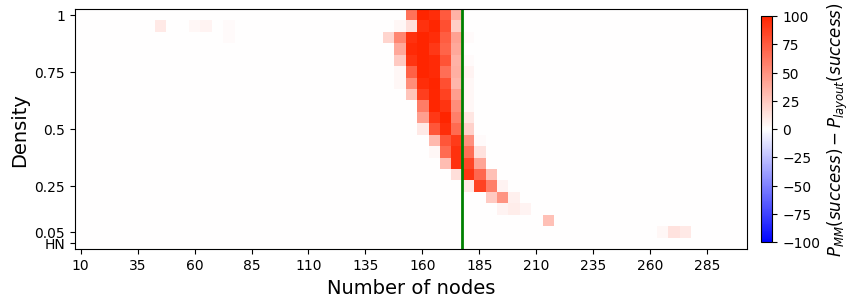

In [103]:
PER = np.zeros((21,59))
layout_PER = np.zeros((21,59))
PER[0] = layout_PER[0] = 100
PER[1:] = percentages
layout_PER[1:] = layout_percentages

# Get the 'jet' colormap
jet = plt.get_cmap('jet')

# Extract the red and blue ends from jet
blue_jet = jet(0.13)   # RGBA at the blue end
red_jet = jet(0.87)    # RGBA at the red end

# Create a new diverging colormap: red (from jet) -> white -> blue (from jet)
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_bwr_like',
    [blue_jet, (1, 1, 1, 1), red_jet],  # RGBA values: red -> white -> blue
    N=256
)

fig, ax = plt.subplots(figsize = (9,4))
im = plt.imshow(PER - layout_PER, cmap=custom_cmap, vmin=-100, vmax = 100)
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
# ax.set_xticks(range(0,len(sizes)-13,5),labels = list(sizes[range(18,len(sizes),5)])+[300])
ax.set_xticks(range(0,59,5),labels = range(10,59*5+10,25))
ax.set_yticks([0,1,5,10,15,20], labels=["HN", 0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.0162, pad=0.02)
cbar.set_label(r'$P_{MM}(success) - P_{layout}(success)$', fontsize=12)

ax.axvline(x=33.5, color='green', linewidth=2)
# plt.savefig("frontier.pdf", bbox_inches = 'tight')
plt.show()

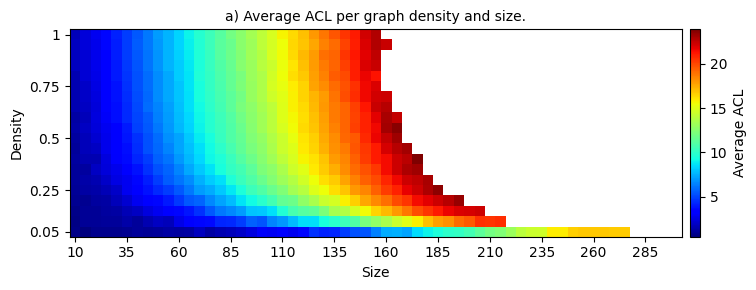

In [35]:
fig, ax = plt.subplots(figsize=(100, 3))
im = plt.imshow(layout_A, cmap='jet')
ax.invert_yaxis()
ax.set_title('a) Average ACL per graph density and size.', fontsize=10)
ax.set_xlabel('Size', fontsize=10)
ax.set_ylabel('Density', fontsize=10)
ax.set_xticks(range(0,len(sizes),5),labels = sizes[range(0,len(sizes),5)])

ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])
# ax.set_yticks([1, 5, 10, 15, 20], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.015, pad=0.0008)
cbar.set_label('Average ACL', fontsize=10)
# cbar.set_ticks(range(0,25,5))
# cbar.set_ticklabels(range(0,25,5))

plt.tight_layout()
# plt.savefig('performance.svg')
plt.show()

C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_3716\2732918821.py:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=2000)


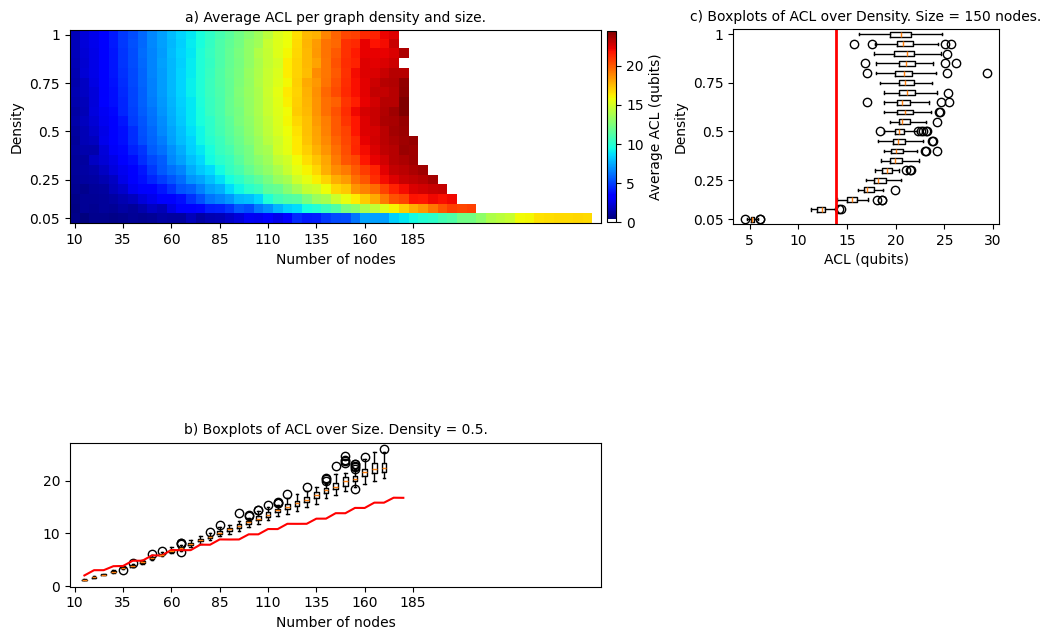

In [59]:
# # Create a 2x2 grid (first figure spans top row)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True, width_ratios=[3, 1.5], height_ratios=[4, 1])
plt.subplots_adjust(hspace=2000)


# First subplot (0,0) spanning both columns
im = axs[0, 0].imshow(A[:, :55], cmap="jet")
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('a) Average ACL per graph density and size.', fontsize=10)
axs[0, 0].set_xlabel('Number of nodes', fontsize=10)
axs[0, 0].set_ylabel('Density', fontsize=10)
axs[0, 0].set_xticks(range(0, len(sizes), 5), labels=sizes[range(0, len(sizes), 5)])
axs[0, 0].set_yticks([0, 4, 9, 14, 19], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = fig.colorbar(im, ax=axs[0, 0], fraction=0.018, pad=0.01)
cbar.set_label('Average ACL (qubits)', fontsize=10)
cbar.set_ticks(range(0, 25, 5))
cbar.set_ticklabels(range(0, 25, 5))

# Second subplot (1,0) - Boxplot over Size
den = 9
axs[1, 0].boxplot(acl[den, :36].T)
# axs[1, 0].set_ylabel('ACL', fontsize=10)
axs[1, 0].set_xlabel('Number of nodes', fontsize=10)
axs[1, 0].set_title(f'b) Boxplots of ACL over Size. Density = {densities[den]}.', fontsize=10)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_xticks(range(0, 36, 5), labels=range(10, 210, 25))

axs[1, 0].plot(range(1, 35), clique_acl[:34], 'red')

# Third subplot (1,1) - Boxplot over Density
size = 28
axs[0, 1].boxplot(acl[:,size,:].T, vert=False, positions = range(20))
axs[0, 1].set_xlabel('ACL (qubits)', fontsize=10)
axs[0, 1].set_ylabel('Density', fontsize=10)
axs[0, 1].set_title(f'c) Boxplots of ACL over Density. Size = {sizes[size]} nodes.', fontsize=10)
axs[0, 1].sharey(axs[0, 0])
# axs[0, 1].set_ylim(axs[0, 0].get_ylim())
# axs[0, 0].set_aspect(1)
# axs[0, 1].set_aspect(1)
# axs[0, 1].set_yticks(axs[0, 0].get_yticks())
# axs[0, 1].set_yticks([0, 4, 9, 14, 19], labels=[0.05, 0.25, 0.5, 0.75, 1])
axs[0, 1].axvline(x=2074 / 150, color='red', linewidth=2)

# rectangular_aspect = axs[0, 0].get_box_aspect()  # Get the natural aspect ratio of [0,0]
# axs[0, 1].set_aspect(rectangular_aspect)  # Apply it to [0,1]


# axs[0, 0].set_ylim(0, 20)
# axs[1, 0].set_xlim(0, 34)

axs[0, 1].set_aspect(axs[0, 0].get_aspect())

# Hide empty top-right subplot (0,1)
fig.delaxes(axs[1, 1])



# Show the combined figure
# plt.tight_layout

# plt.savefig("trifigure.svg")
plt.show()

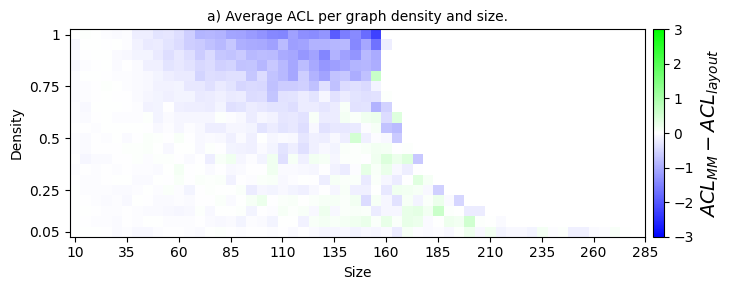

In [163]:
blue_jet = jet(0.13)   # RGBA at the blue end
# Create a new diverging colormap: red (from jet) -> white -> blue (from jet)
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_bwr_like',
    [blue_jet, (1, 1, 1, 1), [0,1,0]],  # RGBA values: red -> white -> blue
    N=256
)

fig, ax = plt.subplots(figsize=(100, 3))
im = plt.imshow((A-layout_A)[:,:55], cmap=custom_cmap, vmin=-3, vmax=3)
ax.invert_yaxis()
ax.set_title('a) Average ACL per graph density and size.', fontsize=10)
ax.set_xlabel('Size', fontsize=10)
ax.set_ylabel('Density', fontsize=10)
ax.set_xticks(range(0,len(sizes),5),labels = sizes[range(0,len(sizes),5)])

ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])
# ax.set_yticks([1, 5, 10, 15, 20], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.015, pad=0.0008)
cbar.set_label(r'$ACL_{MM} - ACL_{layout}$', fontsize=14)
# cbar.set_ticks(range(0,25,5))
# cbar.set_ticklabels(range(0,25,5))

plt.tight_layout()
# plt.savefig('performance.svg')
plt.show()

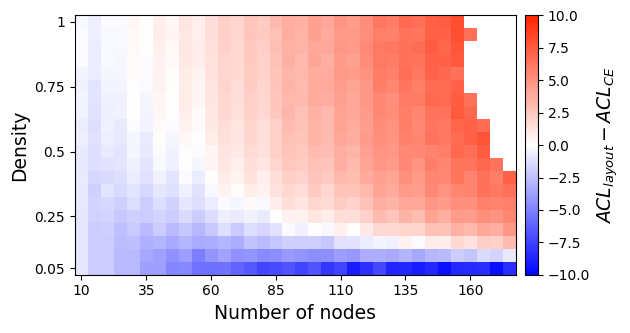

In [72]:

# Get the 'jet' colormap
jet = plt.get_cmap('jet')

# Extract the red and blue ends from jet
blue_jet = jet(0.13)   # RGBA at the blue end
red_jet = jet(0.87)    # RGBA at the red end

# Create a new diverging colormap: red (from jet) -> white -> blue (from jet)
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_bwr_like',
    [blue_jet, (1, 1, 1, 1), red_jet],  # RGBA values: red -> white -> blue
    N=256
)


B = np.maximum(layout_A,np.ones(np.shape(layout_A)))[:,:34] - [clique_acl[:34] for i in range(20)]

fig, ax = plt.subplots()
im = plt.imshow(B, cmap = custom_cmap, vmin = -10, vmax = 10)
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=13.5)
ax.set_ylabel('Density', fontsize=13.5)
ax.set_xticks(range(0,35,5),labels = range(10,185,25))
ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])

# Add color bar
cbar = plt.colorbar(im, fraction=0.028, pad=0.02)
cbar.set_label(label=fr'$ACL_{{layout}} - ACL_{{CE}}$', fontsize=13.5)

plt.tight_layout()
# plt.savefig('mm_vs_ce.pdf', bbox_inches='tight')

plt.show()

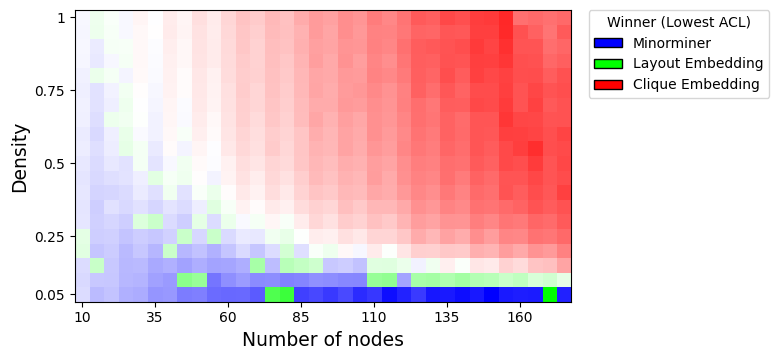

In [25]:
B = layout_A[:, :34]
C = np.array([clique_acl[:34] for _ in range(20)])  # 

shape = (20, 34)

# Stack the arrays into a 3D array of shape (H, W, 3)
stacked = np.stack([A[:, :34], B, C], axis=-1)

# Step 1: Find winner (min index per pixel)
winner = np.nanargmin(stacked, axis=-1)

# Step 2: Calculate contrast (e.g., how different is winner from others)
# We'll use (max - min) as a proxy for contrast
contrast = np.nanmax(stacked, axis=-1) - np.nanmin(stacked, axis=-1)
contrast = contrast / (np.max(contrast) + 1e-8)  # Normalize to [0,1]

# Step 3: Map winner to base color (RGB)
base_colors = np.array([[0, 0, 1],  # Red for A
                        [0, 1, 0],  # Green for B
                        [1, 0, 0]]) # Blue for C

# Prepare RGB image
rgb = np.ones((*(shape), 3))  # Start with white

for i in range(3):
    mask = winner == i
    for c in range(3):
        rgb[..., c][mask] = (1 - contrast[mask]) * 1.0 + contrast[mask] * base_colors[i, c]

# Plotting
fig, ax = plt.subplots()
im = ax.imshow(rgb)
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=13.5)
ax.set_ylabel('Density', fontsize=13.5)
ax.set_xticks(range(0, 35, 5), labels=range(10, 185, 25))
ax.set_yticks([0, 4, 9, 14, 19], labels=[0.05, 0.25, 0.5, 0.75, 1])
# ax.set_title("Color = Min Value, Whiter = Less Difference", fontsize=12)

from matplotlib.patches import Patch

# Define legend elements
legend_elements = [
    Patch(facecolor=[0,0,1],   edgecolor='k', label='Minorminer'),
    Patch(facecolor=[0,1,0], edgecolor='k', label='Layout Embedding'),
    Patch(facecolor=[1,0,0],  edgecolor='k', label='Clique Embedding')
]

# Add the legend to the plot
ax.legend(handles=legend_elements, title='Winner (Lowest ACL)', loc='upper right', bbox_to_anchor=(1.4, 1),  # X=1.02 (just outside right), Y=0.5 (centered vertically)
    borderaxespad=0, frameon=True)


# plt.tight_layout()
plt.show()


C:\Users\aitor.gomez-tejedor\AppData\Local\Temp\ipykernel_25892\2163105140.py:20: RuntimeWarning: All-NaN slice encountered
  contrast = np.nanmax(stacked, axis=-1) - np.nanmin(stacked, axis=-1)


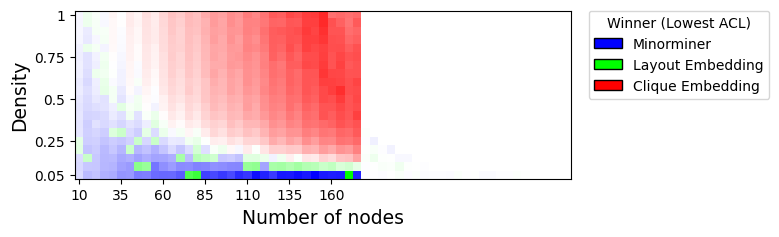

In [34]:
shape = (20, 59)

# Step 0: Stack arrays
stacked = np.stack([A, layout_A, np.array([clique_acl for _ in range(20)])], axis=-1)

# Step 1: Mask where all 3 values are NaN
all_nan_mask = np.all(np.isnan(stacked), axis=-1)  # shape (20, 59)

# Step 2: Replace NaNs with +inf (so they don't win)
safe_stacked = np.where(np.isnan(stacked), np.inf, stacked)

# Step 3: Compute winner safely
winner = np.argmin(safe_stacked, axis=-1)  # shape (20, 59)

# # Step 4: Compute contrast
# nanmax = np.nanmax(stacked, axis=-1)
# stacked_wo_max = np.where(stacked == nanmax[..., np.newaxis], np.nan, stacked)
# contrast = nanmax - np.nanmean(stacked_wo_max, axis=-1)

contrast = np.nanmax(stacked, axis=-1) - np.nanmin(stacked, axis=-1)
contrast = contrast / (np.nanmax(contrast) + 1e-8)


# Step 5: Base colors
base_colors = np.array([[0, 0, 1],  # Minorminer
                        [0, 1, 0],  # Layout Embedding
                        [1, 0, 0]]) # Clique Embedding

# Step 6: Prepare RGB image (start with white)
rgb = np.ones((*shape, 3))

# Step 7: Fill in colored regions based on winner and contrast
for i in range(3):
    mask = (winner == i) & (~all_nan_mask)  # only apply where values are valid
    for c in range(3):
        rgb[..., c][mask] = (1 - contrast[mask]) * 1.0 + contrast[mask] * base_colors[i, c]

# Step 8: Plotting
fig, ax = plt.subplots()
im = ax.imshow(rgb)
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=13.5)
ax.set_ylabel('Density', fontsize=13.5)
ax.set_xticks(range(0, 35, 5), labels=range(10, 185, 25))
ax.set_yticks([0, 4, 9, 14, 19], labels=[0.05, 0.25, 0.5, 0.75, 1])

legend_elements = [
    Patch(facecolor=[0,0,1],   edgecolor='k', label='Minorminer'),
    Patch(facecolor=[0,1,0], edgecolor='k', label='Layout Embedding'),
    Patch(facecolor=[1,0,0],  edgecolor='k', label='Clique Embedding')
]

ax.legend(handles=legend_elements, title='Winner (Lowest ACL)', loc='upper right', bbox_to_anchor=(1.4, 1),
    borderaxespad=0, frameon=True)

plt.show()


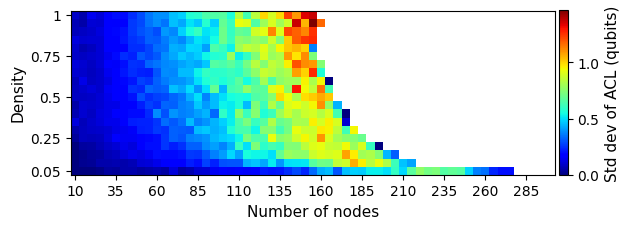

In [160]:
fig, ax = plt.subplots()
im = plt.imshow(layout_std_acl, cmap="jet")
ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=11)
ax.set_ylabel('Density', fontsize=11)
ax.set_xticks(range(0,len(sizes),5),labels = sizes[range(0,len(sizes),5)])

ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.0166, pad=0.01)
cbar.set_label('Std dev of ACL (qubits)', fontsize=11)

plt.tight_layout()

# plt.savefig('std.pdf', bbox_inches='tight')
plt.show()

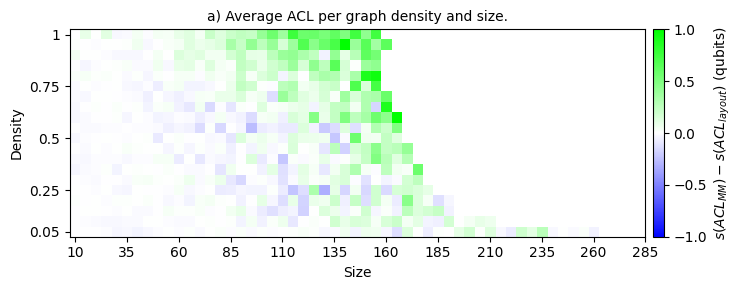

In [169]:
blue_jet = jet(0.13)   # RGBA at the blue end
# Create a new diverging colormap: red (from jet) -> white -> blue (from jet)
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_bwr_like',
    [blue_jet, (1, 1, 1, 1), [0,1,0]],  # RGBA values: red -> white -> blue
    N=256
)

fig, ax = plt.subplots(figsize=(100, 3))
im = plt.imshow((std_acl-layout_std_acl)[:,:55], cmap=custom_cmap, vmin=-1, vmax=1)
ax.invert_yaxis()
ax.set_title('a) Average ACL per graph density and size.', fontsize=10)
ax.set_xlabel('Size', fontsize=10)
ax.set_ylabel('Density', fontsize=10)
ax.set_xticks(range(0,len(sizes),5),labels = sizes[range(0,len(sizes),5)])

ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])
# ax.set_yticks([1, 5, 10, 15, 20], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.015, pad=0.0008)
cbar.set_label(r'$s(ACL_{MM}) - s(ACL_{layout})$ (qubits)', fontsize=10)
# cbar.set_ticks(range(0,25,5))
# cbar.set_ticklabels(range(0,25,5))

plt.tight_layout()
# plt.savefig('performance.svg')
plt.show()

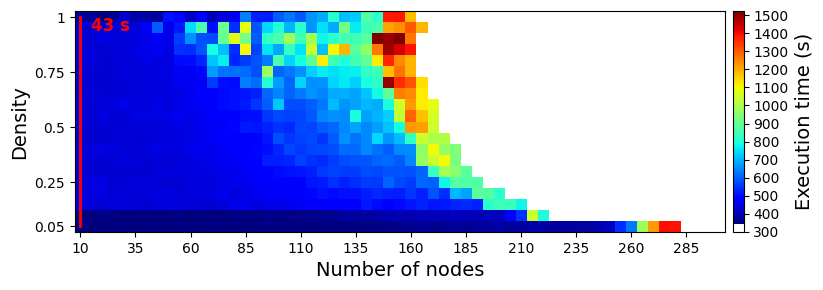

In [11]:
Tl = layout_times.copy()
Tl[Tl == 0] = np.nan

fig, ax = plt.subplots(figsize=(100, 3))
im = plt.imshow(Tl, cmap="jet")

# --- Compute the clean boundary line ---
boundary_x = []
boundary_y = []

for y in range(Tl.shape[0]):
    row = Tl[y]
    x_indices = np.where(row >= 43)[0]
    if len(x_indices) > 0:
        boundary_x.append(x_indices[0])
        boundary_y.append(y)

# Plot clean red line
ax.plot(boundary_x, boundary_y, color='red', linewidth=2)

# Add '43 s' label at the end of the line
label_x = boundary_x[-1]
label_y = boundary_y[-1]
ax.text(label_x + 1, label_y, "43 s", color='red', fontsize=12, weight='bold', va='top')

ax.invert_yaxis()
ax.set_xlabel('Number of nodes', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_xticks(range(0, len(sizes), 5), labels=sizes[range(0, len(sizes), 5)])
ax.set_yticks([0, 4, 9, 14, 19], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction=0.015, pad=0.0008)
cbar.set_label('Execution time (s)', fontsize=14)
cbar.set_ticks(range(300, 1501, 100))
cbar.set_ticklabels(range(300, 1501, 100))

plt.tight_layout()
plt.show()


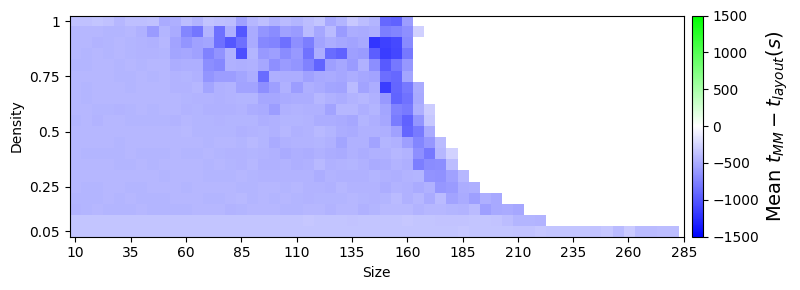

In [171]:
fig, ax = plt.subplots(figsize=(100, 3))
im = plt.imshow((T-Tl)[:,:55], cmap=custom_cmap, vmin=-1500, vmax = 1500)
ax.invert_yaxis()
# ax.set_title('a) Average ACL per graph density and size.', fontsize=10)
ax.set_xlabel('Size', fontsize=10)
ax.set_ylabel('Density', fontsize=10)
ax.set_xticks(range(0,len(sizes),5),labels = sizes[range(0,len(sizes),5)])

ax.set_yticks([0,4,9,14,19],labels = [0.05,0.25,0.5,0.75,1])
# ax.set_yticks([1, 5, 10, 15, 20], labels=[0.05, 0.25, 0.5, 0.75, 1])

# Add color bar
cbar = plt.colorbar(im, fraction = 0.015, pad=0.0008)
cbar.set_label(r'Mean $t_{MM} - t_{layout} (s)$', fontsize=14)
# cbar.set_ticks(range(0,25,5))
# cbar.set_ticklabels(range(0,25,5))

plt.tight_layout()
# plt.savefig('performance.svg')
plt.show()